# A1 - Please evaluate confusion matrix for your classification problem. From confusion matrix, the other performance metrics such as precision, recall and F1-Score measures for both training and test data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).

Accuracy: 0.9712121212121212


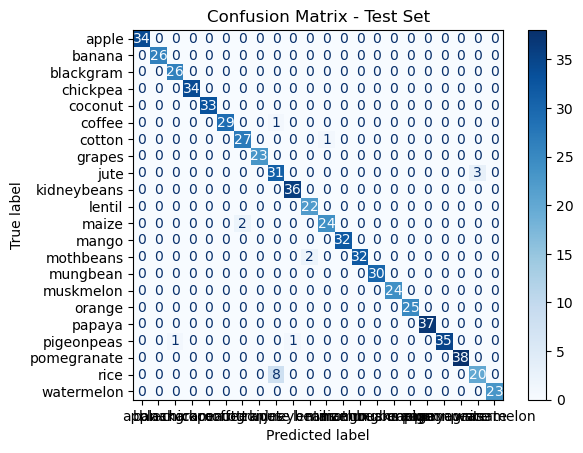

Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 27  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0 32  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# Read the dataset
dataset = pd.read_csv(r'/Users/swethaayyappan/Downloads/Crop_recommendation.csv') 

# Assuming 'label' is the column containing class labels and other columns are features
X = dataset.drop('label', axis=1).values
y = dataset['label'].values

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train kNN classifier
neighbour = KNeighborsClassifier(n_neighbors=3)
neighbour.fit(X_train, y_train)

# Test accuracy of kNN classifier
accuracy = neighbour.score(X_test, y_test)
print("Accuracy:", accuracy)

# Predict using kNN classifier
predictions = neighbour.predict(X_test)
#print("Predictions:", predictions)

# Evaluate confusion matrix and performance metrics
conf_matrix = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=neighbour.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".0f")
plt.title('Confusion Matrix - Test Set')
plt.show()

precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print("Confusion Matrix:")
print(conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



*REMARKS*

Based on these metrics, the model appears to have a regular or well-fitting fit. The model is generalising well to new data, as demonstrated by the high and near values of the test and training performance indicators. The lack of a discernible difference between the test and training performance metrics indicates that neither overfitting nor underfitting is a problem. As a result, it seems that the model fits the dataset well.

# A2 - Calculate MSE, RMSE, MAPE and R2 scores for the price prediction exercise done in Lab 03. Analyse the results.

In [ ]:
## PRICE PREDICTION

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

df = pd.read_excel('/Users/swethaayyappan/Downloads/Lab Session1 Data.xlsx', sheet_name='IRCTC Stock Price')

df.head()


,Date,Month,Day,Price,Open,High,Low,Volume,Chg%
0,"Jun 29, 2021",Jun,Tue,2081.85,2092.00,2126.90,2065.05,1.67M,0.0020
1,"Jun 28, 2021",Jun,Mon,2077.75,2084.00,2112.45,2068.40,707.73K,0.0043
2,"Jun 25, 2021",Jun,Fri,2068.85,2084.35,2088.50,2053.10,475.82K,-0.0020
3,"Jun 24, 2021",Jun,Thu,2072.95,2098.00,2098.00,2066.00,541.51K,-0.0026
4,"Jun 23, 2021",Jun,Wed,2078.25,2102.00,2111.40,2072.00,809.62K,-0.0023


In [29]:

# Preprocess the data
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Volume'] = df['Volume'].str.replace('K', '000').str.replace('M', '000000').str.replace('.', '').astype(float) # Convert volume to numeric

# Encode categorical variables
df['Day'] = df['Day'].astype('category')
df['Day'] = df['Day'].cat.codes

# Split dataset into features (X) and target variable (y)
X = df[['Month', 'Day', 'Open', 'High', 'Low', 'Volume']]
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the kNN model
k = 3  # Set the value of k
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 52634.42866666666
Root Mean Squared Error (RMSE): 229.4219446057126
Mean Absolute Percentage Error (MAPE): 0.10299616628644609
R-squared (R2): 0.21541754234561328


# A3 - Generate 20 data points(training set data)consisting of 2 features(X & Y)whose values vary randomly between 1 & 10. Based on the values, assign these 20 points to 2 different classes(class 0-Blue & class1 – Red). Make a scatter plot of the training data and color the points as per their class color.Observe the plot.

# A4 - Generate test set data with values of X & Y varying between 0 and 10 with increments of 0.1. This creates a test set of about 10,000 points. Classify these points with above training data using kNN classifier (k = 3). Make a scatter plot of the test data output with test points colored as per their predicted class colors(all points predicted class0 are labeled blue color). Observe the color spread and class boundary lines in the feature space.

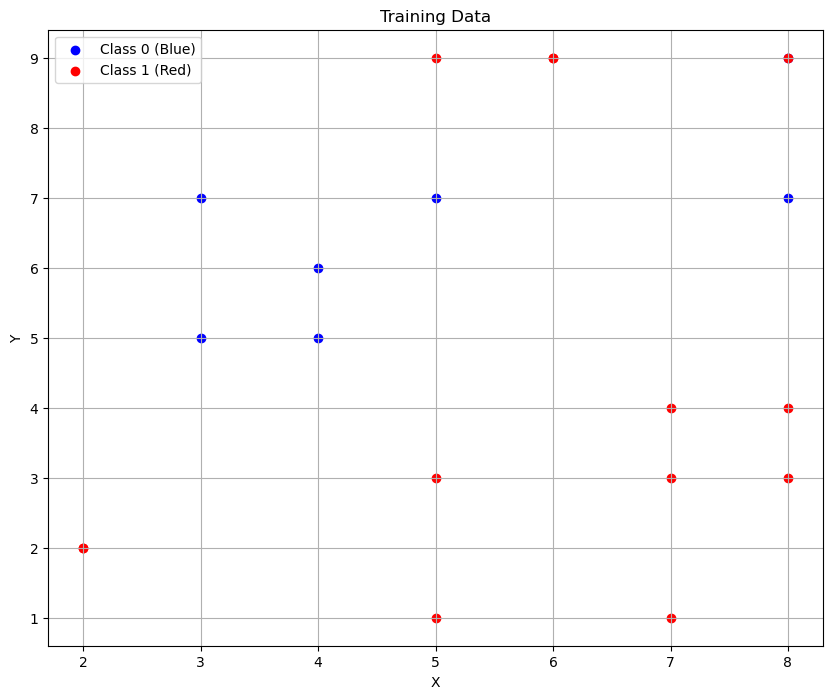

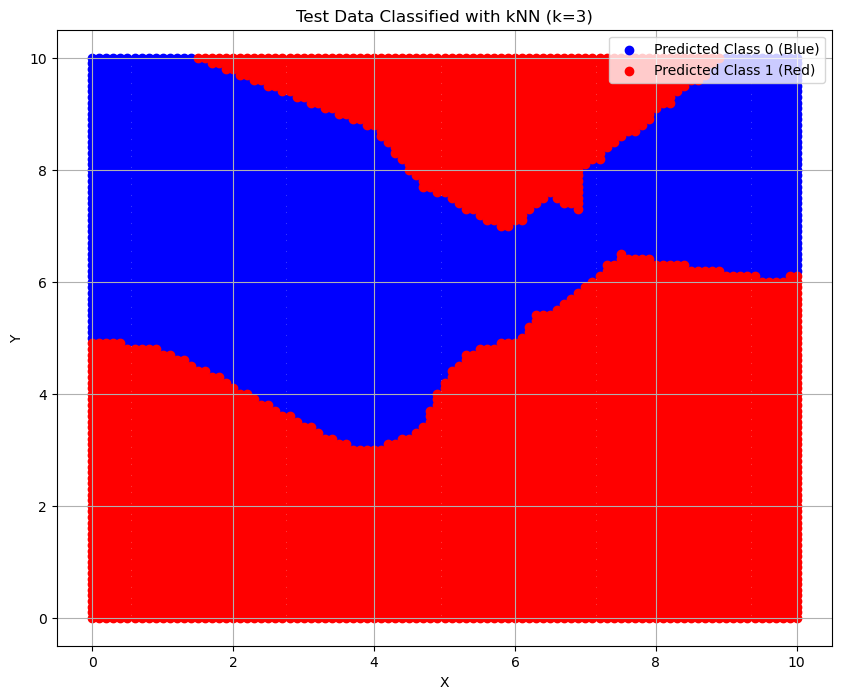

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generate random training data
np.random.seed(42)
num_points = 20
X_train = np.random.randint(1, 10, size=num_points)
Y_train = np.random.randint(1, 10, size=num_points)
class_labels_train = np.random.randint(0, 2, size=num_points)

# Scatter plot of training data
plt.figure(figsize=(10, 8))
plt.scatter(X_train[class_labels_train == 0], Y_train[class_labels_train == 0], color='blue', label='Class 0 (Blue)')
plt.scatter(X_train[class_labels_train == 1], Y_train[class_labels_train == 1], color='red', label='Class 1 (Red)')
plt.title('Training Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Generate test data
x_test = np.arange(0, 10.1, 0.1)
y_test = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_test, y_test)
test_points = np.column_stack((X_test.ravel(), Y_test.ravel()))

# Train kNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(np.column_stack((X_train, Y_train)), class_labels_train)

# Classify test points
predicted_classes = knn_classifier.predict(test_points)

# Scatter plot of test data with predicted class colors
plt.figure(figsize=(10, 8))
plt.scatter(test_points[predicted_classes == 0, 0], test_points[predicted_classes == 0, 1], color='blue', alpha=1, label='Predicted Class 0 (Blue)')
plt.scatter(test_points[predicted_classes == 1, 0], test_points[predicted_classes == 1, 1], color='red', alpha=1, label='Predicted Class 1 (Red)')
plt.title('Test Data Classified with kNN (k=3)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


# A5 - Repeat A4 exercise for various values of k and observe the change in the class boundary lines.

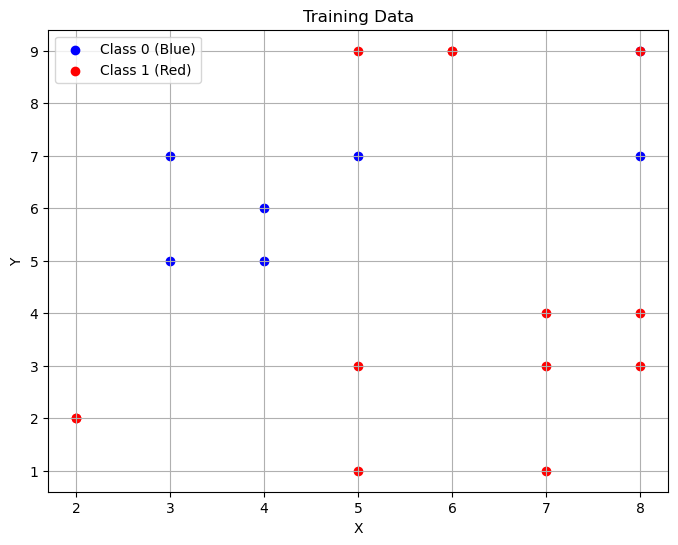

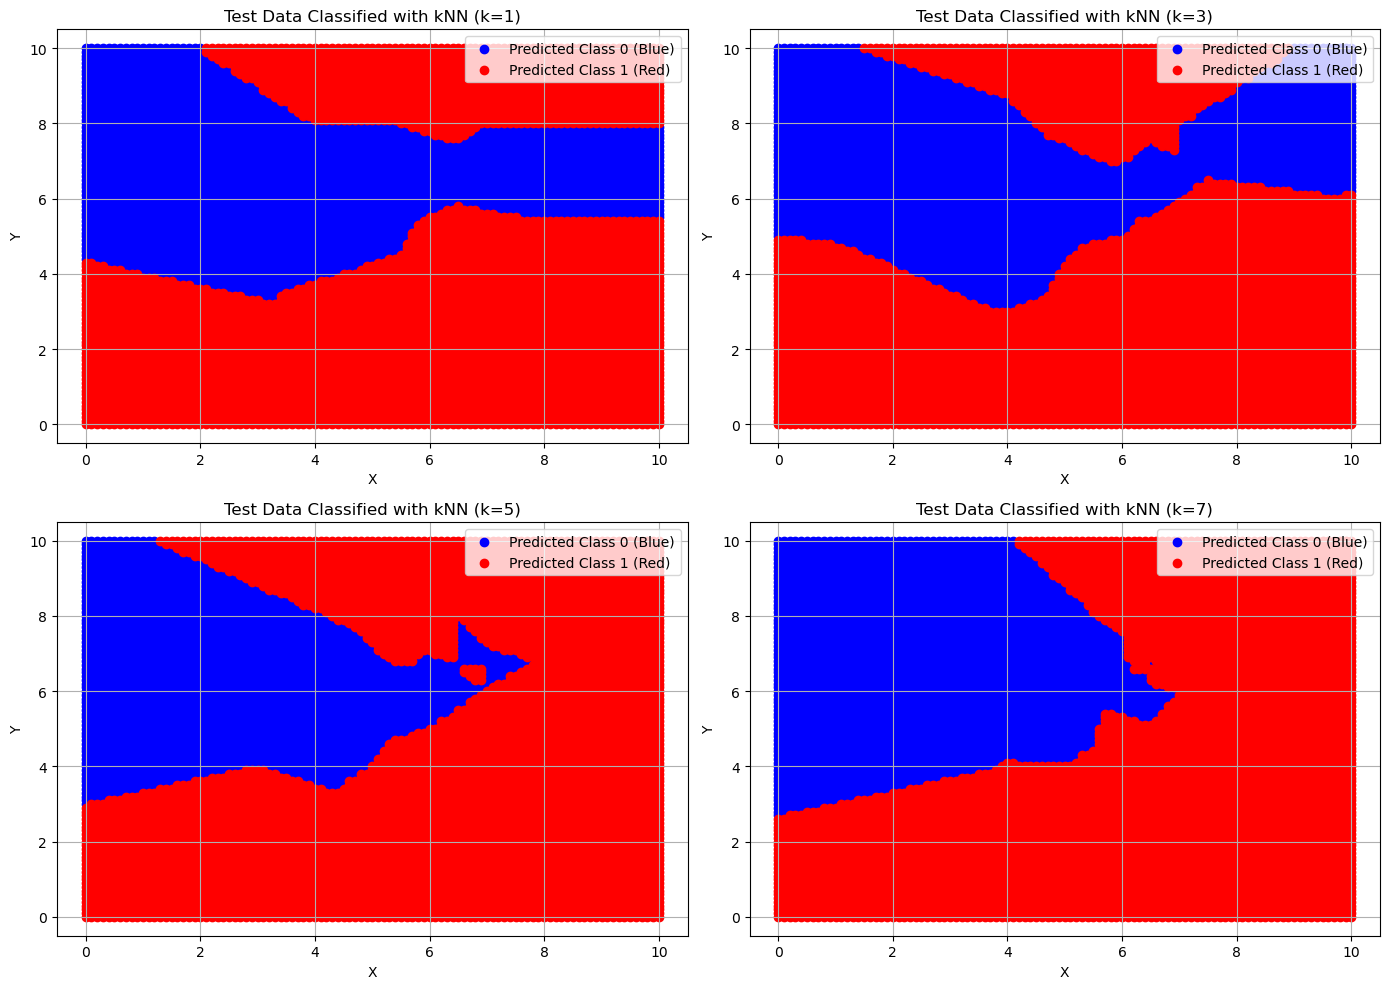

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generate random training data
np.random.seed(42)
num_points = 20
X_train = np.random.randint(1, 10, size=num_points)
Y_train = np.random.randint(1, 10, size=num_points)
class_labels_train = np.random.randint(0, 2, size=num_points)

# Scatter plot of training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[class_labels_train == 0], Y_train[class_labels_train == 0], color='blue', label='Class 0 (Blue)')
plt.scatter(X_train[class_labels_train == 1], Y_train[class_labels_train == 1], color='red', label='Class 1 (Red)')
plt.title('Training Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Generate test data
x_test = np.arange(0, 10.1, 0.1)
y_test = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_test, y_test)
test_points = np.column_stack((X_test.ravel(), Y_test.ravel()))

# Define different values of k
k_values = [1, 3, 5, 7]

# Plot test data with class boundary lines for each value of k
plt.figure(figsize=(14, 10))
for i, k in enumerate(k_values, start=1):
    # Train kNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(np.column_stack((X_train, Y_train)), class_labels_train)

    # Classify test points
    predicted_classes = knn_classifier.predict(test_points)

    # Plot test data with predicted class colors
    plt.subplot(2, 2, i)
    plt.scatter(test_points[predicted_classes == 0, 0], test_points[predicted_classes == 0, 1], color='blue', label='Predicted Class 0 (Blue)')
    plt.scatter(test_points[predicted_classes == 1, 0], test_points[predicted_classes == 1, 1], color='red', label='Predicted Class 1 (Red)')
    plt.title(f'Test Data Classified with kNN (k={k})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


# A6 - Repeat the exercises A3 to A5 for yourproject data considering any two features and classes.

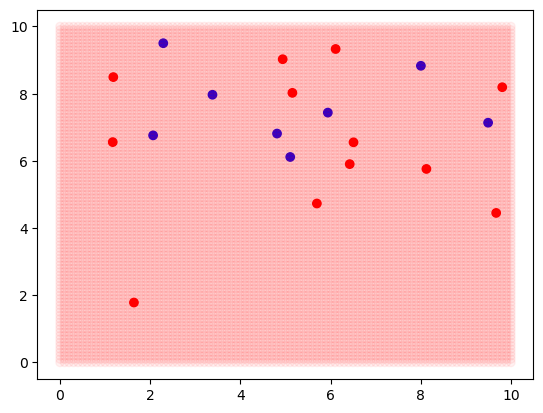

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Loading project dataset
df = pd.read_csv(r'/Users/swethaayyappan/Downloads/Crop_recommendation.csv')


X_project = df[['temperature', 'humidity']].values
y_project = df['label'].values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_project, y_project, test_size=0.2, random_state=42)

# Generate 20 data points(training set data) consisting of 2 features (X & Y) whose values vary randomly between 1 & 10.
np.random.seed(0)
X = np.random.uniform(1, 10, (20, 2))
y = np.random.randint(0, 2, 20)

# Generate test set data with values of X & Y varying between 0 and 10 with increments of 0.1.
test_X, test_Y = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
test_data = np.column_stack((test_X.ravel(), test_Y.ravel()))

# Classify test points using kNN classifier (k = 3) trained on the project dataset
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train, y_train)
predicted_classes = kNN.predict(test_data)

# Plot the training data
colors_train = ['blue' if c == 0 else 'red' for c in y]
plt.scatter(X[:, 0], X[:, 1], color=colors_train)

# Plot the test data with predicted classes
colors_test = ['blue' if c == 0 else 'red' for c in predicted_classes]
plt.scatter(test_data[:, 0], test_data[:, 1], color=colors_test, alpha=0.05)
plt.show()

# A7 -  Use RandomSearchCV()or GridSearchCV()operations to find the ideal ‘k’value for your kNN classifier. This is called hyper-parameter tuning.

In [33]:
from sklearn.model_selection import GridSearchCV

X_feature = df[['temperature', 'humidity']]
y_feature = df['label']

# Splitting the dataset into training and testing sets
X_train_project, X_test_project, y_train_project, y_test_project = train_test_split(X_feature, y_feature, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

# Create the kNN classifier
knn = KNeighborsClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_project, y_train_project)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'n_neighbors': 9}
